**R_network_analysis_test.R.ipynb** - play with R and large matrices, see how it goes.

# R network analysis files

Related files:

* network descriptives
    * network-level
        
        * files
            
            * R scripts:
                
                * `context_analysis/R/db_connect.r`
                * `context_analysis/R/sna/functions-sna.r`
                * `context_analysis/R/sna/sna-load_data.r`
                * `context_analysis/R/sna/igraph/*`
                * `context_analysis/R/sna/statnet/*`
        
        * statnet/sna
            
            * `sna::gden()` - graph density
            * R scripts:
                
                * `context_analysis/R/sna/statnet/sna-statnet-init.r`
                * `context_analysis/R/sna/statnet/sna-statnet-network-stats.r`
                * `context_analysis/R/sna/statnet/sna-qap.r`
        
        * igraph
            
            * `igraph::transitivity()` - vector of transitivity scores for each node in a graph, plus network-level transitivity score.
                
                * Q - interpretation?
                
            * R scripts:
                
                * `context_analysis/R/sna/statnet/sna-igraph-init.r`
                * `context_analysis/R/sna/statnet/sna-igraph-network-stats.r`


# Setup

## Setup -  working directories

Store important directories and file names in variables:

In [1]:
getwd()

[1] "/home/jonathanmorgan/work/django/research/research/work/phd_work/analysis/network_data"

In [2]:
# code files (in particular SNA function library, modest though it may be)
base_code_directory <- "/home/jonathanmorgan/work/django/research/research/context_analysis/R"
sna_code_directory <- paste( base_code_directory, "/sna", sep = "" )
code_directory <- sna_code_directory
sna_function_file_path <- paste( sna_code_directory, "/", 'functions-sna.r', sep = "" )

# home directory
home_directory <- getwd()
home_directory <- "/home/jonathanmorgan/work/django/research/research/work/phd_work/analysis/network_data"

# data directories
#data_directory <- paste( home_directory, "/data", sep = "" )
data_directory <- "/home/jonathanmorgan/shares/phd_work/network_data/year_pairs"
workspace_file_name <- "statnet-grp-test.RData"
workspace_file_path <- paste( data_directory, "/", workspace_file_name )

In [3]:
# set working directory to data directory for now.
setwd( data_directory )
getwd()

[1] "/home/jonathanmorgan/shares/phd_work/network_data/year_pairs"

## Setup - import SNA functions

source the file `functions-sna.r`.

In [4]:
source( sna_function_file_path )

## Setup - import statnet functions

- Back to [Table of Contents](#Table-of-Contents)

source the file `statnet/functions-statnet.r`.  This file includes:

- `compareMatricesQAP()`, used extensively below.

In [5]:
# statnet/sna functions
# - /home/jonathanmorgan/work/django/research/context_analysis/R/sna/stanet/functions-statnet.r
statnetFunctionFilePath <- paste( code_directory, "/statnet/", 'functions-statnet.r', sep = "" )

In [6]:
source( statnetFunctionFilePath )

Loading required package: statnet.common


Attaching package: ‘statnet.common’


The following objects are masked from ‘package:base’:

    attr, order


Loading required package: network


‘network’ 1.17.2 (2022-05-20), part of the Statnet Project
* ‘news(package="network")’ for changes since last version
* ‘citation("network")’ for citation information
* ‘https://statnet.org’ for help, support, and other information


sna: Tools for Social Network Analysis
Version 2.7 created on 2022-05-09.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
 For citation information, type citation("sna").
 Type help(package="sna") to get started.




## Setup - network data - render and store network data

First, need render to render network data and upload it to your server.

Directions for creating network data: 

- network data creation example notebook: [analysis-network_data_output_example.ipynb](../analysis-network_data_output_example.ipynb)

    - this shows programmatic data creation using JSON file to capture request parameters.
    - includes all parameters and a few examples of different ways you can set parameters.

- actual network data creation notebook: [analysis-network_data_output-GRP.ipynb](./analysis-network_data_output-GRP.ipynb)

You want a tab-delimited matrix that includes both the network and attributes of nodes as columns, and you want it to include a header row.

Once you render your network data files, you should place them on the server.

High level data file layout:

- tab-delimited.
- first row and first column are labels
- last 2 columns are traits of nodes (`person_id` and `person_type`)
- each row and column after first until the trait columns represents a person found in one of the articles.
- The people are in the same order from top to bottom and left to right.
- Where the row and column of two people meet, and one of the people is an author, the nunber in the cell where they meet is the number of times the non-author was quoted in an article by the author.  Does not include more basic two-mode co-location ties (appeared in same article, even if not an author and/or not quoted).

Files and their location on server:

### data - grp_month

This is data from the Grand Rapids Press articles from December of 2009, coded by both humans and OpenCalais.

Files:

- automated full month - `sourcenet_data-20171205-022551-grp_month-automated.tab`
- automated week subset - `sourcenet_data-20171206-031358-grp_month-automated-week_subset.tab`
- human full month - `sourcenet_data-20171115-043102-grp_month-human.tab`
- human week subset - `sourcenet_data-20171206-031319-grp_month-human-week_subset.tab`

Location in Dropbox: `Dropbox/academia/MSU/program_stuff/prelim_paper/data/network_analysis/2017.11.14/network/new_coders/grp_month`

Location on server: `/home/jonathanmorgan/work/django/research/work/phd_work/data/network/grp_month`

## Setup - load workspace (optional)

If you want, you can load this file's workspace, from a previous run:

In [7]:
# assumes that you've already set working directory above to the
#     working directory.
setwd( data_directory )
load( workspace_file_name )

Warning message in readChar(con, 5L, useBytes = TRUE):
“cannot open compressed file 'statnet-grp-test.RData', probable reason 'No such file or directory'”


ERROR: Error in readChar(con, 5L, useBytes = TRUE): cannot open the connection


# GRP analysis

## test loading large network matrix

First, we'll just try to load a 5 GB network matrix (all people from entire time, ties from articles in 2005).

In [ ]:
# initialize variables
testDataFolder <- data_directory
testDataFile <- "all_grp_hard_news_2005-20220603-015300.txt"
testDataPath <- paste( testDataFolder, "/", testDataFile, sep = "" )

In [ ]:
testDataPath

Load the data file into memory

In [ ]:
# tab-delimited:
testDataDF <- read.delim( testDataPath, header = TRUE, row.names = 1, check.names = FALSE )

In [ ]:
# get count of rows...
testRowCount <- nrow( testDataDF )
paste( "test row count = ", testRowCount, sep = "" )

# ...and columns
testColumnCount <- ncol( testDataDF )
paste( "test column count = ", testColumnCount, sep = "" )

Get just the tie rows and columns for initializing network libraries.

In [ ]:
# the below syntax returns only as many columns as there are rows, so
#     omitting any trait columns that lie in columns on the right side
#     of the file.
testNetworkDF <- testDataDF[ , 1 : testRowCount ]
#str( testNetworkDF )

In [ ]:
# convert to a matrix
testNetworkMatrix <- as.matrix( testNetworkDF )
# str( testNetworkMatrix )

### `test` - initialize statnet

- Back to [Table of Contents](#Table-of-Contents)

First, load the statnet package, then load the automated grp_month data into statnet object and assign attributes to nodes.

Based on `context_text/R/sna/statnet/sna-statnet-init.r`.

In [ ]:
# make sure you've loaded the statnet library
#install.packages( "statnet" )
library( statnet )

In [ ]:
# If you have a data frame of attributes (each attribute is a column, with
#     attribute name the column name), you can associate those attributes
#     when you create the network.
# attribute help: http://www.inside-r.org/packages/cran/network/docs/loading.attributes

# load attributes from a file:
#tab_attribute_test1 <- read.delim( "tab-test1-attribute_data.txt", header = TRUE, row.names = 1, check.names = FALSE )

# or create DataFrame by just grabbing the attribute columns
testNetworkAttributeDF <- testDataDF[ , ( testColumnCount - 1 ) : testColumnCount ]

# convert matrix to statnet network object instance.
testNetworkStatnet <- network( testNetworkMatrix, matrix.type = "adjacency", directed = FALSE, vertex.attr = testNetworkAttributeDF )

# look at information now.
testNetworkStatnet

# Network attributes:
#  vertices = 314
#  directed = FALSE
#  hyper = FALSE
#  loops = FALSE
#  multiple = FALSE
#  bipartite = FALSE
#  total edges= 309
#    missing edges= 0
#    non-missing edges= 309
#
# Vertex attribute names:
#    person_type vertex.names
#
# No edge attributes


### `test` - Basic metrics

- Back to [Table of Contents](#Table-of-Contents)

In [ ]:
# assuming that our statnet network object is in reference test1_statnet.

# Use the degree function in the sna package to create vector of degree values
#    for each node.  Make sure to pass the gmode parameter to tell it that the
#    graph is not directed (gmode = "graph", instead of "digraph").
# Doc: http://www.inside-r.org/packages/cran/sna/docs/degree
#degree_vector <- degree( test1_statnet, gmode = "graph" )

# If you have other libraries loaded that also implement a degree function, you
#    can also call this with package name:
testDegreeVector <- sna::degree( testNetworkStatnet, gmode = "graph" )

# output the vector
#testDegreeVector

# want more info on the degree function?  You can get to it eventually through
#    the following:
#help( package = "sna" )
#??sna::degree

# what is the average (mean) degree?
testAvgDegree <- mean( testDegreeVector )
paste( "average degree = ", testAvgDegree, sep = "" )

# subset vector to get only those that are above mean
testAboveMeanVector <- testDegreeVector[ testDegreeVector > testAvgDegree ]

# Take the degree and associate it with each node as a node attribute.
#    (%v% is a shortcut for the get.vertex.attribute command)
testNetworkStatnet %v% "degree" <- testDegreeVector

# also add degree vector to original data frame
testDataDF$degree <- testDegreeVector


In [ ]:
# average author degree (person types 2 and 4)
testAverageAuthorDegree2And4 <- calcAuthorMeanDegree( dataFrameIN = testDataDF, includeBothIN = TRUE )
paste( "average author degree (2 and 4) = ", testAverageAuthorDegree2And4, sep = "" )

# average author degree (person type 2 only)
testAverageAuthorDegreeOnly2 <- calcAuthorMeanDegree( dataFrameIN = testDataDF, includeBothIN = FALSE )
paste( "average author degree (only 2) = ", testAverageAuthorDegreeOnly2, sep = "" )

# average source degree (person types 3 and 4)
testAverageSourceDegree3And4 <- calcSourceMeanDegree( dataFrameIN = testDataDF, includeBothIN = TRUE )
paste( "average source degree (3 and 4) = ", testAverageSourceDegree3And4, sep = "" )

# average source degree (person type 3 only)
testAverageSourceDegreeOnly3 <- calcSourceMeanDegree( dataFrameIN = testDataDF, includeBothIN = FALSE )
paste( "average source degree (only 3) = ", testAverageSourceDegreeOnly3, sep = "" )


### `test` - More metrics

- Back to [Table of Contents](#Table-of-Contents)

Now that we have the data in statnet object, run the code in the following for more in-depth information:

* `context_text/R/sna/statnet/sna-statnet-network-stats.r`

In [ ]:
# Links:
# - manual (PDF): http://cran.r-project.org/web/packages/sna/sna.pdf
# - good notes: http://www.shizukalab.com/toolkits/sna/node-level-calculations

# Also, be advised that statnet and igraph don't really play nice together.
#    If you'll be using both, best idea is to have a workspace for each.

#==============================================================================#
# statnet
#==============================================================================#

# make sure you've loaded the statnet library (includes sna)
# install.packages( "statnet" )
#library( statnet )

#==============================================================================#
# NODE level
#==============================================================================#

# what is the standard deviation of the degrees?
testDegreeSd <- sd( testDegreeVector )
paste( "degree SD = ", testDegreeSd, sep = "" )

# what is the variance of the degrees?
testDegreeVar <- var( testDegreeVector )
paste( "degree variance = ", testDegreeVar, sep = "" )

# what is the max value among the degrees?
testDegreeMax <- max( testDegreeVector )
paste( "degree max = ", testDegreeMax, sep = "" )

# calculate and plot degree distributions
testDegreeFrequenciesTable <- table( testDegreeVector )
paste( "degree frequencies = ", testDegreeFrequenciesTable, sep = "" )
testDegreeFrequenciesTable

# node-level undirected betweenness
testBetweenness <- sna::betweenness( testNetworkStatnet, gmode = "graph", cmode = "undirected" )

#paste( "betweenness = ", testBetweenness, sep = "" )
# associate with each node as a node attribute.
#    (%v% is a shortcut for the get.vertex.attribute command)
testNetworkStatnet %v% "betweenness" <- testBetweenness

# also add degree vector to original data frame
testDataDF$betweenness <- testBetweenness

#==============================================================================#
# NETWORK level
#==============================================================================#

# graph-level degree centrality
testDegreeCentrality <- sna::centralization( testNetworkStatnet, sna::degree, mode = "graph" )
paste( "degree centrality = ", testDegreeCentrality, sep = "" )

# graph-level betweenness centrality
testBetweennessCentrality <- sna::centralization( testNetworkStatnet, sna::betweenness, mode = "graph", cmode = "undirected" )
paste( "betweenness centrality = ", testBetweennessCentrality, sep = "" )

# graph-level connectedness
testConnectedness <- sna::connectedness( testNetworkStatnet )
paste( "connectedness = ", testConnectedness, sep = "" )

# graph-level transitivity
testTransitivity <- sna::gtrans( testNetworkStatnet, mode = "graph" )
paste( "transitivity = ", testTransitivity, sep = "" )

# graph-level density
testDensity <- sna::gden( testNetworkStatnet, mode = "graph" )
paste( "density = ", testDensity, sep = "" )


### `test` - create node attribute DataFrame

- Back to [Table of Contents](#Table-of-Contents)

If you want to just work with the traits of the nodes/vertexes, you can combine the attribute vectors into a data frame.

In [ ]:
#==============================================================================#
# output attributes to data frame
#==============================================================================#

# if you want to just work with the traits of the nodes/vertexes, you can
#    combine the attribute vectors into a data frame.

# first, output network object to see what attributes you have
testNetworkStatnet

# then, combine them into a data frame.
testNodeAttrDF <- data.frame( id = testNetworkStatnet %v% "vertex.names",
                                     person_id = testNetworkStatnet %v% "person_id",
                                     person_type = testNetworkStatnet %v% "person_type",
                                     degree = testNetworkStatnet %v% "degree",
                                     betweenness = testNetworkStatnet %v% "betweenness" )


# QAP

## Load matrix 1 - before

In [8]:
# initialize variables
beforeDataFolder <- data_directory
beforeDataFile <- "grp_years_1_pre-20220603-182828.tab"
beforeDataPath <- paste( beforeDataFolder, "/", beforeDataFile, sep = "" )

In [9]:
beforeDataPath

[1] "/home/jonathanmorgan/shares/phd_work/network_data/year_pairs/grp_years_1_pre-20220603-182828.tab"

Load the data file into memory

In [10]:
# tab-delimited:
beforeDataDF <- read.delim( beforeDataPath, header = TRUE, row.names = 1, check.names = FALSE )

In [11]:
# get count of rows...
beforeRowCount <- nrow( beforeDataDF )
paste( "before row count = ", beforeRowCount, sep = "" )

# ...and columns
beforeColumnCount <- ncol( beforeDataDF )
paste( "before column count = ", beforeColumnCount, sep = "" )

[1] "before row count = 23387"

[1] "before column count = 23389"

Get just the tie rows and columns for initializing network libraries.

In [12]:
# the below syntax returns only as many columns as there are rows, so
#     omitting any trait columns that lie in columns on the right side
#     of the file.
beforeNetworkDF <- beforeDataDF[ , 1 : beforeRowCount ]
#str( beforeNetworkDF )

In [13]:
# convert to a matrix
beforeNetworkMatrix <- as.matrix( beforeNetworkDF )
# str( beforeNetworkMatrix )

## Load matrix 2 - after

In [14]:
# initialize variables
afterDataFolder <- data_directory
afterDataFile <- "grp_years_1_post-20220603-183235.tab"
afterDataPath <- paste( afterDataFolder, "/", afterDataFile, sep = "" )

In [15]:
afterDataPath

[1] "/home/jonathanmorgan/shares/phd_work/network_data/year_pairs/grp_years_1_post-20220603-183235.tab"

Load the data file into memory

In [16]:
# tab-delimited:
afterDataDF <- read.delim( afterDataPath, header = TRUE, row.names = 1, check.names = FALSE )

In [17]:
# get count of rows...
afterRowCount <- nrow(afterDataDF )
paste( "after row count = ", afterRowCount, sep = "" )

# ...and columns
afterColumnCount <- ncol( afterDataDF )
paste( "after column count = ", afterColumnCount, sep = "" )

[1] "after row count = 23387"

[1] "after column count = 23389"

Get just the tie rows and columns for initializing network libraries.

In [18]:
# the below syntax returns only as many columns as there are rows, so
#     omitting any trait columns that lie in columns on the right side
#     of the file.
afterNetworkDF <- afterDataDF[ , 1 : afterRowCount ]
#str( afterNetworkDF )

In [19]:
# convert to a matrix
afterNetworkMatrix <- as.matrix( afterNetworkDF )
# str( afterNetworkMatrix )

## run QAP correlation

In [20]:
outputPrefix <- "years_before_to_after_layoffs"

In [21]:
beforeToAfterLayoffOutput <- compareMatricesQAP( beforeNetworkMatrix, afterNetworkMatrix, outputPrefix, doQapIN = FALSE )
#beforeToAfterLayoffOutput <- compareMatricesQAP( beforeNetworkMatrix, afterNetworkMatrix, outputPrefix, repsIN = 10 )

==> Start of  compareMatricesQAP  at  2022-06-03 19:05:42

----> years_before_to_after_layoffs graph correlation = 0.5023296490798 ( @ 2022-06-03 19:09:23 )

----> years_before_to_after_layoffs SKIPPED QAP correlation analysis

----> years_before_to_after_layoffs graph covariance = 0.00019013287420071 ( @ 2022-06-03 19:11:09 )

----> years_before_to_after_layoffs SKIPPED QAP covariance analysis

----> years_before_to_after_layoffs graph hamming distance = 87812 ( @ 2022-06-03 19:11:59 )

----> years_before_to_after_layoffs SKIPPED QAP hamming distance analysis

==> End of  compareMatricesQAP  at  2022-06-03 19:11:59



----> years_before_to_after_layoffs graph correlation = 0.5023296490798

----> years_before_to_after_layoffs QAP correlation analysis summary:



Length  Class   Mode 
     0   NULL   NULL 


0NULLNULL

Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”
Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”


ERROR: Error in plot.window(...): need finite 'xlim' values


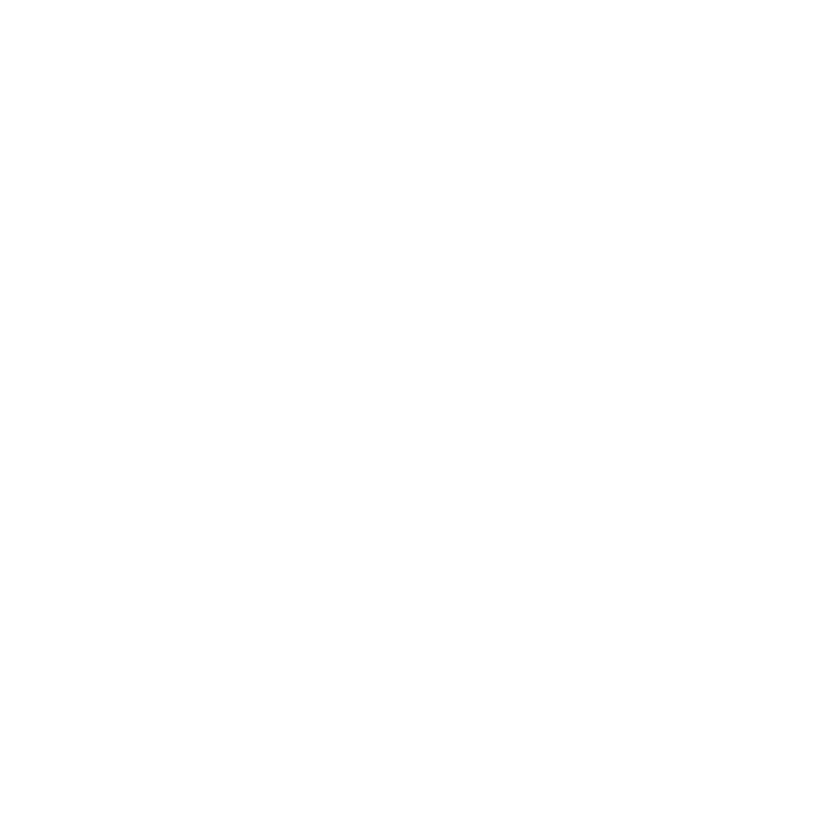

In [22]:
# also output plots of distributions of QAP values?
displayCompareMatricesQAPOutput( beforeToAfterLayoffOutput, outputPrefix, TRUE )